# House Price prediction using Boston dataset.

##  Estimating of what the house would sell for using Linear Regression according to Boston dataset.
## This model   allows us to put in a few features of a house and it thus returns back an estimate of what the house would sell for.

# Imports

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Boston dataset from the inbuilt library sklearn.datasets                    which will be a dictionary of few variables as shown below.

In [69]:
from sklearn.datasets import load_boston
boston = load_boston()# basically a  dictionary.
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


## Description of the attributes of the dataset.

In [70]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Storing the data in form of  a dataframe as its currently is in the form of list of lists and also adding the target variable in the dataframe as MEDV.

In [71]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['MEDV']=boston['target']


In [72]:
boston_df.head(5) #where MEDV is the target variable which is Median value of owner-occupied homes in $1000's.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [73]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Statistical description of the dataset.

In [74]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [75]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

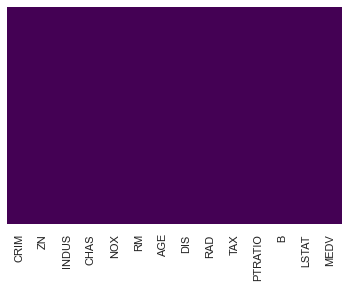

In [76]:
sns.heatmap(boston_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
## THIS shows we have no missing data (missing data would have been shown by different colours)

# Visualising Data
   Exploratory Data Analysis

In [77]:
sns.set_style(style="darkgrid")

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

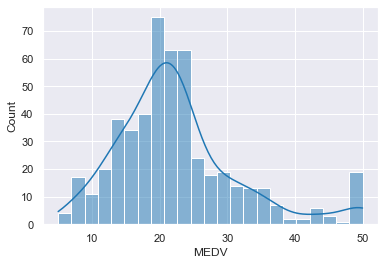

In [78]:
sns.histplot(boston_df["MEDV"],kde=True) # thus normaly distributed data

<AxesSubplot:xlabel='CHAS', ylabel='count'>

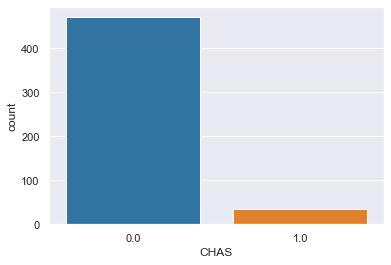

In [79]:
sns.countplot(x='CHAS',data=boston_df)

<AxesSubplot:xlabel='CRIM', ylabel='MEDV'>

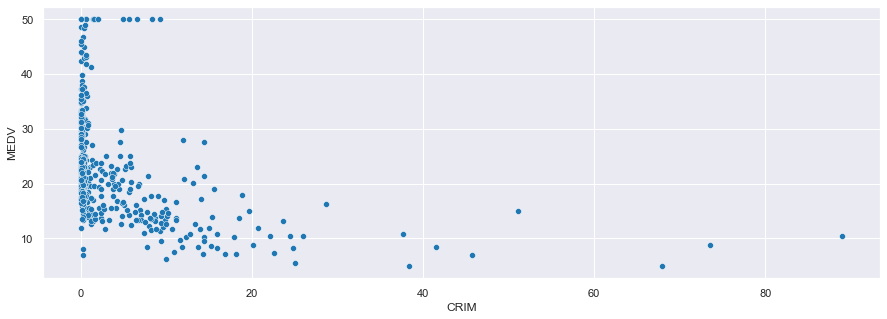

In [80]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='CRIM',y='MEDV',data=boston_df)

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

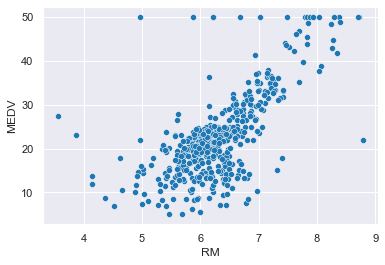

In [81]:
sns.scatterplot(x='RM',y='MEDV',data=boston_df)

## Corelation  value

In [82]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Corelation intensity shwon below as heatmap

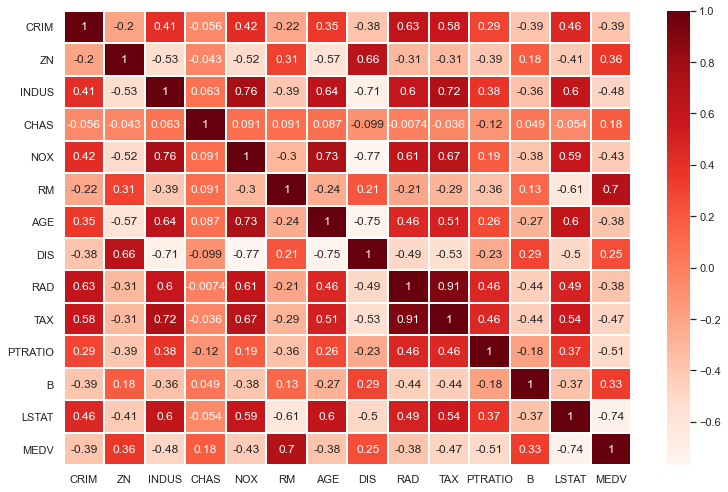

In [83]:
plt.figure(figsize=(11,7))
sns.heatmap(boston_df.corr(),cmap="Reds",linecolor="white",linewidth=1,annot=True)
plt.tight_layout()

# Training the linear regression model

In [84]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# Split data


In [85]:
x=boston_df.drop('MEDV',axis=1)
y=boston_df['MEDV']

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

# Creating and Training Model

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lm=LinearRegression()  #object

In [90]:
lm.fit(x_train,y_train)

LinearRegression()

# Evaluating model

In [91]:
print(lm.intercept_)

40.21892901255082


### :Attribute Information (in order):

### Coefficients

In [92]:
coeff=pd.DataFrame(lm.coef_,index=x_train.columns,columns=['Coefficient'])
coeff

,Coefficient
CRIM,-0.088505
ZN,0.050293
INDUS,0.020348
CHAS,3.754271
NOX,-17.748371
RM,3.247765
AGE,0.012001
DIS,-1.409161
RAD,0.263881
TAX,-0.010344


## Interpreting the coefficients:

-> Holding all other features fixed, a 1 unit increase in CRIM (per capita crime rate) by town 
  is associated with a decrease of 0.088 in 'MEDV'(Median value of owner-occupied homes in $1000's).
  
-> Holding all other features fixed, a 1 unit increase in NOX (nitric oxides concentration (parts per 10 million)) by town 
  is associated with a decrease of 17.748371 in 'MEDV'(Median value of owner-occupied homes in $1000's).
  
-> Holding all other features fixed, a 1 unit increase in CHAS (Charles River dummy variable) by town 
  is associated with an increase of 3.754271 in 'MEDV'(Median value of owner-occupied homes in $1000's).
   which means 3754.271 dollars increase in value.

# Predictions

In [93]:
predictions=lm.predict(x_test)

In [94]:
df = pd.DataFrame({'Actual':y_test, 'Predicted': predictions})
df


,Actual,Predicted
195,50.0,40.111135
4,36.2,27.389719
434,11.7,16.647004
458,14.9,16.984756
39,30.8,31.129201
...,...,...
213,28.1,24.521066
269,20.7,26.346217
278,29.1,29.834238
17,17.5,16.698982


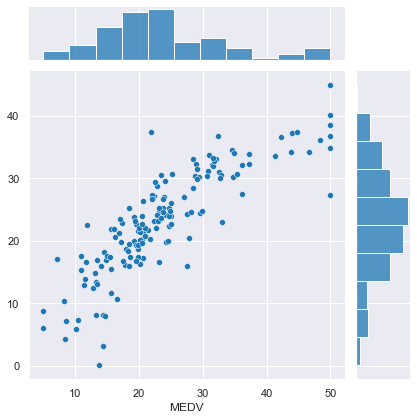

In [95]:
sns.jointplot(x=y_test,y=predictions,kind='scatter')

# Residual Histogram

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

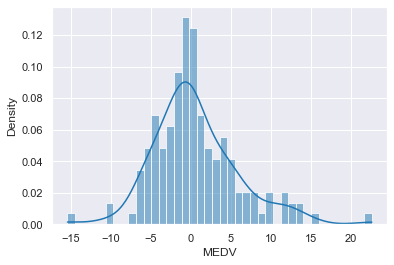

In [96]:
sns.histplot((y_test-predictions),kde=True,stat="density",bins=40)

# Regression Evaluation Metrics

In [97]:
from sklearn import metrics

In [98]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.835696361418927
MSE: 28.547585271468105
RMSE: 5.342994036256086


In [99]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.7123963332666876